# IMF Data - GDP Analysis

**Data Analysis of GDP Data**

A Python-powered exploration of data from International Monetary Fund(IMF).

Web scraping, analysizing and visualizing African GDP per capita data 2021-2024.

In [ ]:
# import required python libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd


In [ ]:
# Web Scraping GDP data from IMF website

url = "https://www.imf.org/en/Publications/WEO/weo-database/2023/October/weo-report?c=614,638,616,748,618,624,622,626,628,632,636,634,662,642,643,734,644,646,648,652,656,654,664,666,668,674,676,678,684,688,728,692,694,714,716,722,718,724,199,733,738,742,746,754,698,&s=NGDPDPC,&sy=2021&ey=2024&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
soup.find('title')

<title>Report for Selected Countries and Subjects</title>

In [ ]:
gdp_data = pd.DataFrame(columns=["Country", "Units", "Scale", "2021", "2022", "2023", "2024"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    country = col[0].text
    units =  col[2].text
    scale =  col[3].text
    year_2021 =  col[5].text
    year_2022 =  col[6].text
    year_2023 =  col[7].text
    year_2024 =  col[8].text

    gdp_data = pd.concat([gdp_data, pd.DataFrame({"Country":[country], "Units":[units], "Scale":[scale], "2021":[year_2021], "2022":[year_2022], "2023":[year_2023], "2024":[year_2024]})], ignore_index=True)

In [ ]:
# viewing a sample of the extracted data
gdp_data.head()

,Country,Units,Scale,2021,2022,2023,2024
0,Angola,U.S. dollars,Units,"2,169.648","3,438.147","2,550.001","2,452.737"
1,Benin,U.S. dollars,Units,"1,360.386","1,303.379","1,449.112","1,540.137"
2,Botswana,U.S. dollars,Units,"7,238.796","7,737.655","7,758.371","8,067.193"
3,Burkina Faso,U.S. dollars,Units,891.781,831.658,888.029,952.370
4,Burundi,U.S. dollars,Units,273.956,310.986,245.811,228.822


In [ ]:
gdp_data.tail()

,Country,Units,Scale,2021,2022,2023,2024
40,Tanzania,U.S. dollars,Units,"1,170.909","1,252.882","1,326.634","1,317.863"
41,Togo,U.S. dollars,Units,964.325,919.575,"1,004.466","1,060.824"
42,Uganda,U.S. dollars,Units,"1,005.078","1,103.109","1,163.034","1,247.872"
43,Zambia,U.S. dollars,Units,"1,137.344","1,485.788","1,435.890","1,468.769"
44,Zimbabwe,U.S. dollars,Units,"2,323.090","1,990.930","2,005.875","2,856.539"


In [ ]:
# getting a brief overview of the data
print(gdp_data.describe())

       Country         Units  Scale       2021       2022       2023  \
count       45            45     45         45         45         45   
unique      45             1      1         45         45         45   
top     Angola  U.S. dollars  Units  2,169.648  3,438.147  2,550.001   
freq         1            45     45          1          1          1   

             2024  
count          45  
unique         45  
top     2,452.737  
freq            1  


In [ ]:
# viewing 2024 data
gdp_data["2024"]

,2024
0,"2,452.737"
1,"1,540.137"
2,"8,067.193"
3,952.370
4,228.822
5,"4,790.431"
6,"1,807.368"
7,572.900
8,715.524
9,"1,406.205"


In [ ]:
#cleaning the data for 2024

# Remove commas, strip spaces, replace known non-numeric values
gdp_data["2024"] = gdp_data["2024"].astype(str).str.replace(",", "", regex=True).str.strip()
# Convert to numeric
gdp_data["2024"] = pd.to_numeric(gdp_data["2024"], errors="coerce")

gdp_data["2024"]

,2024
0,2452.737
1,1540.137
2,8067.193
3,952.370
4,228.822
5,4790.431
6,1807.368
7,572.900
8,715.524
9,1406.205


In [ ]:
# calculate the country with the Highest & Lowest GDP per Capita in 2024

highest = gdp_data.loc[gdp_data["2024"].idxmax()]
lowest = gdp_data.loc[gdp_data["2024"].idxmin()]

print("Country with highest GDP per capita in 2024:\n", highest)
print("Country with lowest GDP per capita in 2024:\n", lowest)

Country with highest GDP per capita in 2024:
 Country      Seychelles
Units      U.S. dollars
Scale             Units
2021         15,306.130
2022         19,982.733
2023          20889.545
2024          21094.598
Name: 36, dtype: object
Country with lowest GDP per capita in 2024:
 Country         Burundi
Units      U.S. dollars
Scale             Units
2021            273.956
2022            310.986
2023            245.811
2024            228.822
Name: 4, dtype: object


In [ ]:
# list countries in order of 2024 GDP per capita
gdp_data.groupby("Country")["2024"].mean().sort_values(ascending=False)


,2024
Country,
Seychelles,21094.598
Mauritius,12773.298
Gabon,8969.103
Botswana,8067.193
Equatorial Guinea,6500.433
South Africa,6426.894
Namibia,5052.894
Cabo Verde,4790.431
Eswatini,4198.353


# Visualize the Results

1. Use MatPlotLib to plot the 2024 GDP data from highest to lowest

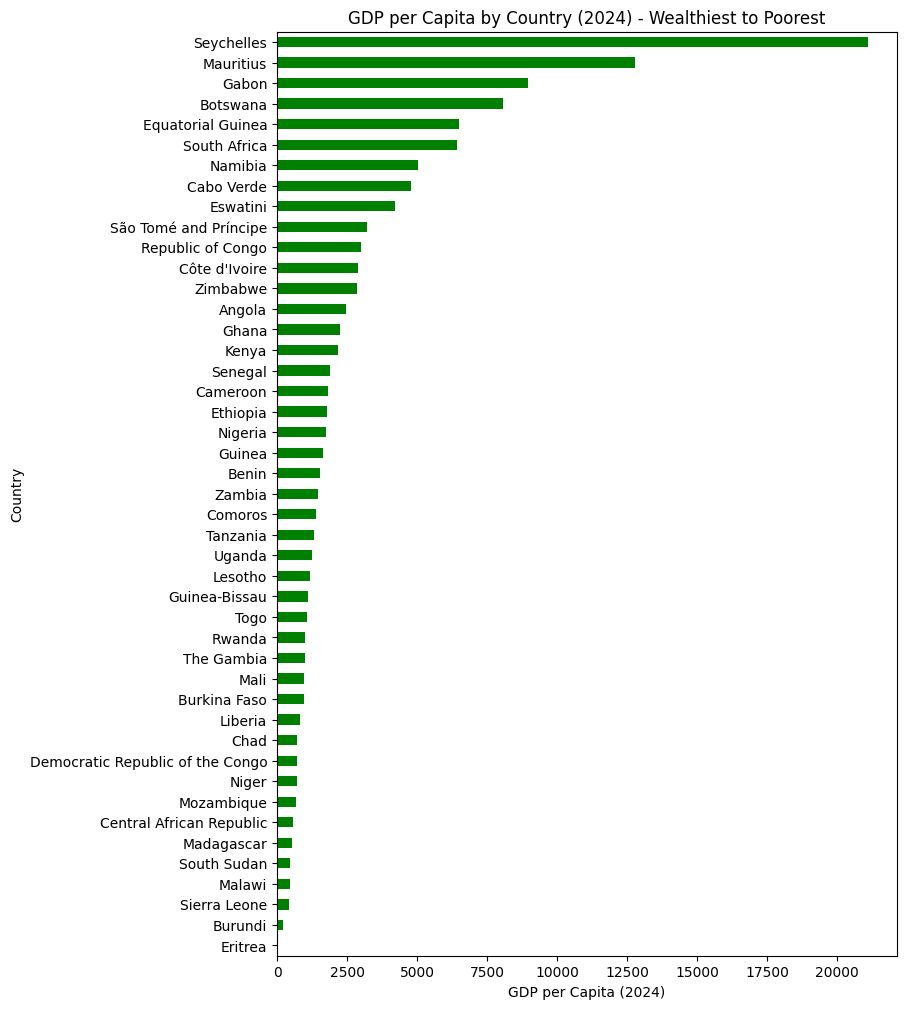

In [ ]:
# import python library
import matplotlib.pyplot as plt


# Sort GDP data from highest to lowest
sorted_gdp = gdp_data.groupby("Country")["2024"].mean().sort_values(ascending=False)


# plotting the bar chart
plt.figure(figsize=(8, 12))
sorted_gdp.plot(kind="barh", color="green")

plt.ylabel("Country")
plt.xlabel("GDP per Capita (2024)")
plt.title("GDP per Capita by Country (2024) - Wealthiest to Poorest")

plt.gca().invert_yaxis()  # Ensure the richest is at the top
plt.show()

2. Use Seaborn to plot Top 10 Highest GDP Countries for 2024

<ipython-input-18-d2bd64908b20>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_gdp.index, x=top_10_gdp.values, palette="Blues_r")


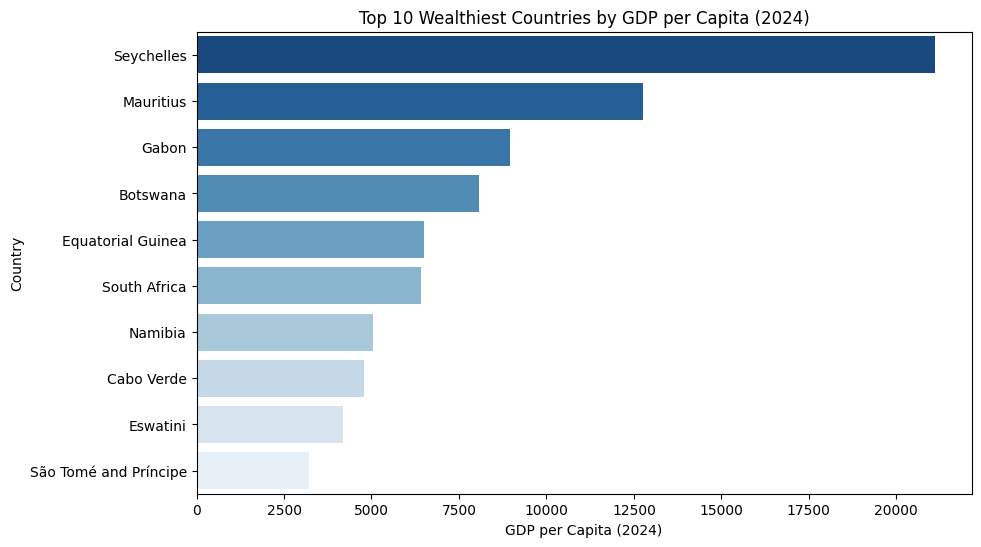

In [ ]:
#import the library
import seaborn as sns

# Sort GDP data from highest to lowest & select the top 10
top_10_gdp = gdp_data.groupby("Country")["2024"].mean().sort_values(ascending=False).head(10)

# Create the figure
plt.figure(figsize=(10, 6))

# Seaborn horizontal bar chart
sns.barplot(y=top_10_gdp.index, x=top_10_gdp.values, palette="Blues_r")

# Labels and title
plt.xlabel("GDP per Capita (2024)")
plt.ylabel("Country")
plt.title("Top 10 Wealthiest Countries by GDP per Capita (2024)")

plt.show()